<a href="https://colab.research.google.com/github/anuravi98/fastai-notebooks/blob/master/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
folder = 'black'
file = 'urls_black.csv'

In [0]:
from fastai.vision import *

In [0]:
path = Path('/content/drive/My Drive/data/bears')
#dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.csv'

In [0]:
folder = 'teddys'
file = 'urls_teddys.csv'

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/data/bears/urls_teddys.csv'),
 PosixPath('/content/drive/My Drive/data/bears/urls_grizzly.csv'),
 PosixPath('/content/drive/My Drive/data/bears/urls_black.csv'),
 PosixPath('/content/drive/My Drive/data/bears/teddys'),
 PosixPath('/content/drive/My Drive/data/bears/black'),
 PosixPath('/content/drive/My Drive/data/bears/grizzly'),
 PosixPath('/content/drive/My Drive/data/bears/models'),
 PosixPath('/content/drive/My Drive/data/bears/cleaned.csv')]

In [0]:
classes = ['teddys','grizzly','black']

In [0]:
path

PosixPath('/content/drive/My Drive/data/bears')

In [0]:
download_images(path/file, dest, max_pics=200)

Error http://www.trendtshirts.com.au/wp-content/uploads/2013/05/our-teddys-web1.png HTTPConnectionPool(host='www.trendtshirts.com.au', port=80): Max retries exceeded with url: /wp-content/uploads/2013/05/our-teddys-web1.png (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fe449776400>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://iphoto.jeancoutu.com/media/3920/product/61ourson.png HTTPSConnectionPool(host='iphoto.jeancoutu.com', port=443): Max retries exceeded with url: /media/3920/product/61ourson.png (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fe44979e2e8>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))


In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


grizzly


black


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.338615,0.545613,0.181818,00:05
1,0.829932,0.283042,0.109091,00:04
2,0.576536,0.237712,0.090909,00:03
3,0.432975,0.200031,0.090909,00:04


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()
  

In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


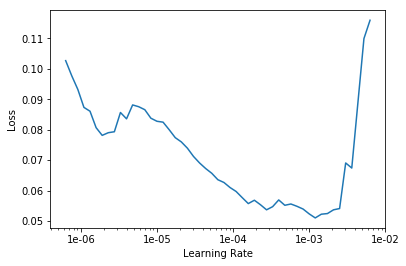

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))


epoch,train_loss,valid_loss,error_rate,time
0,0.109902,0.971594,0.181818,00:04
1,0.119811,1.218736,0.127273,00:04


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

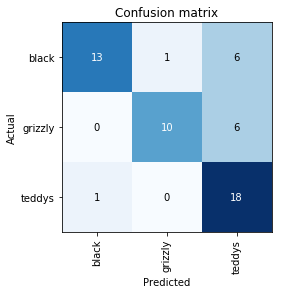

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)


In [0]:
learn_cln.load('stage-2');


In [0]:
losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]


In [0]:
fd = FileDeleter(file_paths=top_loss_paths)


NameError: ignored

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
learn.export()

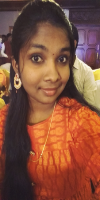

In [0]:
img = open_image(path/'grizzly'/'IMG_20170528_190709.jpg')
img.resize((50,200,100))
img




In [0]:
learn = load_learner(path)


In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category teddys